In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_csv("StudentPerformance.csv")

In [4]:
df.head()

,No,math score,writing score,Ready Score,placement score,club joining,placement offer count
0,1,67.0,76.0,70.0,86.0,2020,3.0
1,2,60.0,84.0,75.0,81.0,2018,2.0
2,3,69.0,86.0,70.0,0.0,2021,1.0
3,4,62.0,NaN,66.0,100.0,2019,3.0
4,5,65.0,95.0,61.0,77.0,2019,2.0


In [5]:
df.shape

(28, 7)

In [6]:
df.dtypes

No                         int64
math score               float64
writing score            float64
Ready Score              float64
placement score          float64
club joining               int64
placement offer count    float64
dtype: object

In [7]:
df.isna().sum()

No                       0
math score               1
writing score            2
Ready Score              1
placement score          2
club joining             0
placement offer count    1
dtype: int64

In [8]:
cols_with_na = []
for col in df.columns:
    if df[col].isna().any():
        cols_with_na.append(col)
cols_with_na

['math score',
 'writing score',
 'Ready Score',
 'placement score',
 'placement offer count']

In [9]:
for col in cols_with_na:
    col_dt = df[col].dtypes
    if (col_dt == 'int64' or col_dt == 'float64'):
        outliers = (df[col] < 0) | (100 < df[col])
        df.loc[outliers, col] = np.nan
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(method='ffill')
df.head()

,No,math score,writing score,Ready Score,placement score,club joining,placement offer count
0,1,67.0,76.000000,70.0,86.0,2020,3.0
1,2,60.0,84.000000,75.0,81.0,2018,2.0
2,3,69.0,86.000000,70.0,0.0,2021,1.0
3,4,62.0,82.692308,66.0,100.0,2019,3.0
4,5,65.0,95.000000,61.0,77.0,2019,2.0


In [10]:
import matplotlib.pyplot as plt

In [11]:
import seaborn as sns

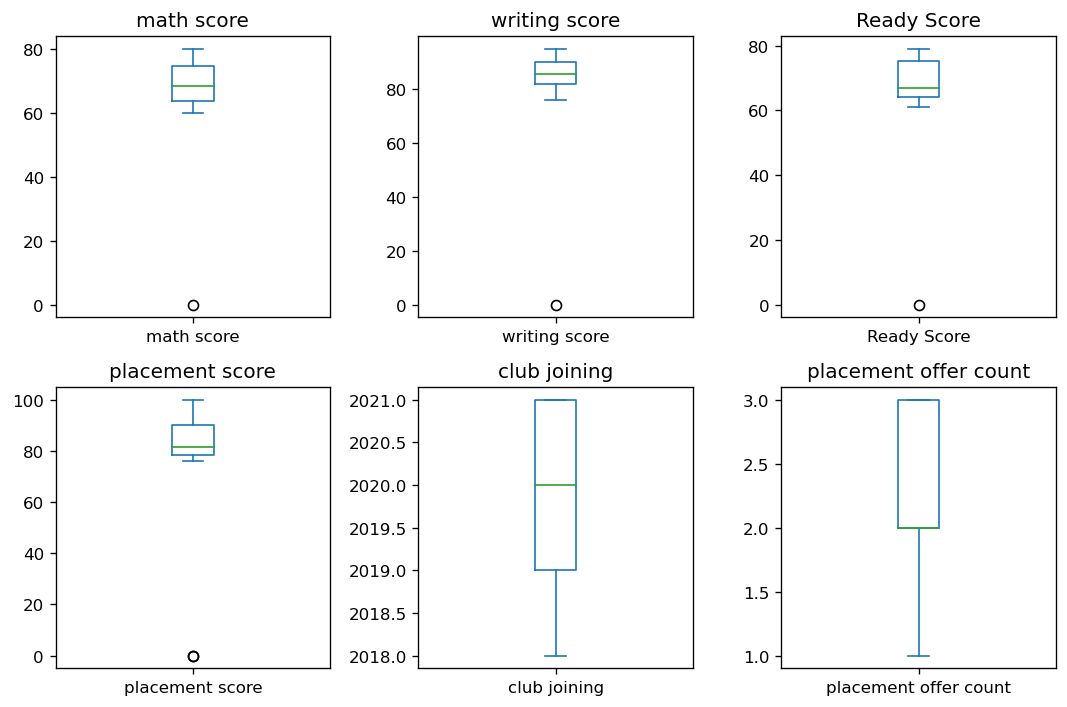

In [12]:
df_list = ['math score', 'writing score', 'Ready Score',
'placement score', 'club joining', 'placement offer count']
fig, axes = plt.subplots(2, 3, figsize=(9, 6), dpi=120)
for i, ax in enumerate(axes.flat):
    if i < len(df_list):
        df[df_list[i]].plot(kind='box', ax=ax)
        ax.set_title(df_list[i])
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns


<Axes: >

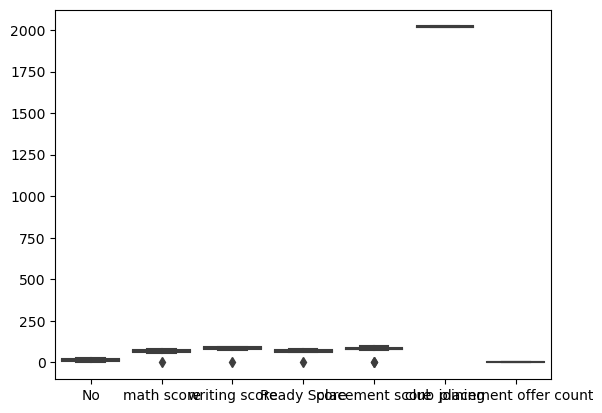

In [14]:
sns.boxplot(df)

In [15]:
Q1 = df['writing score'].quantile(0.25)
Q3 = df['writing score'].quantile(0.75)
IQR = Q3 - Q1
Lower_limit = Q1 - 1.5 * IQR
Upper_limit = Q3 + 1.5 * IQR
print(f'Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}, Lower_limit = {Lower_limit}, Upper_limit = {Upper_limit}')

Q1 = 82.0, Q3 = 90.25, IQR = 8.25, Lower_limit = 69.625, Upper_limit = 102.625


In [16]:
df[(df['writing score'] < Lower_limit) | (df['writing score'] > Upper_limit)]

,No,math score,writing score,Ready Score,placement score,club joining,placement offer count
5,6,60.0,0.0,65.0,100.0,2021,3.0


C:\Users\aades\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


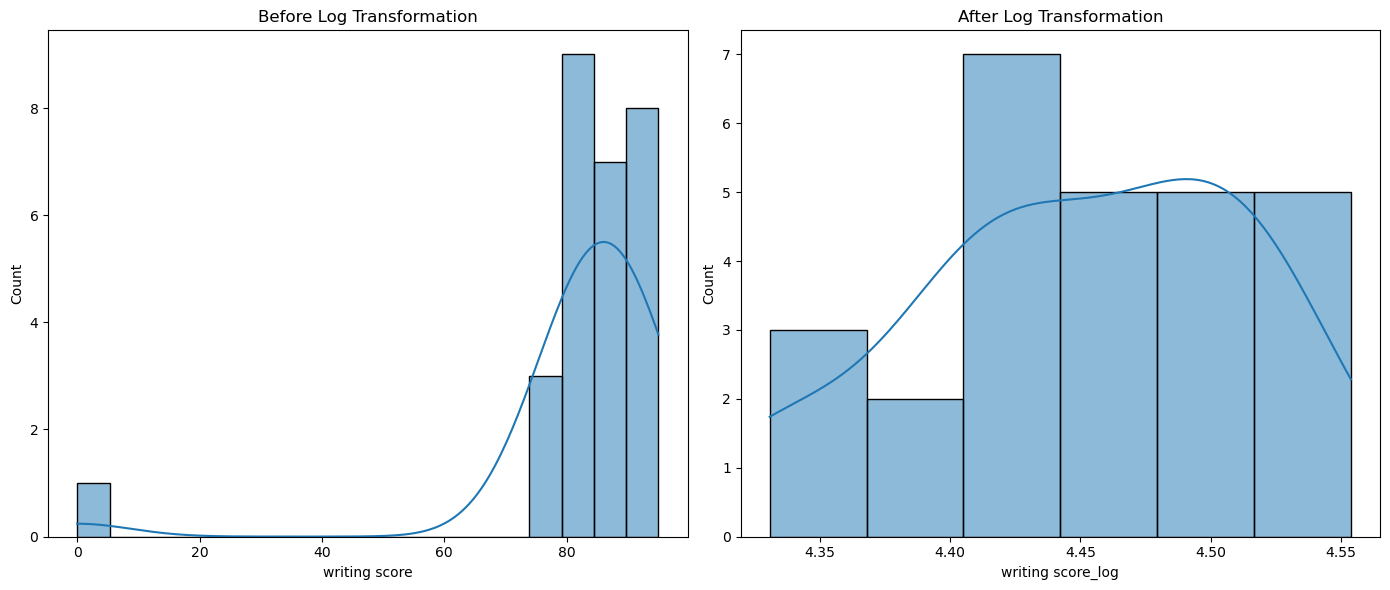

In [17]:
df['writing score_log'] = np.log(df['writing score'])
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(data=df, x="writing score", ax=axes[0], kde=True)
sns.histplot(data=df, x="writing score_log", ax=axes[1], kde=True)

axes[0].set_title('Before Log Transformation')
axes[1].set_title('After Log Transformation')

plt.tight_layout()
plt.show()

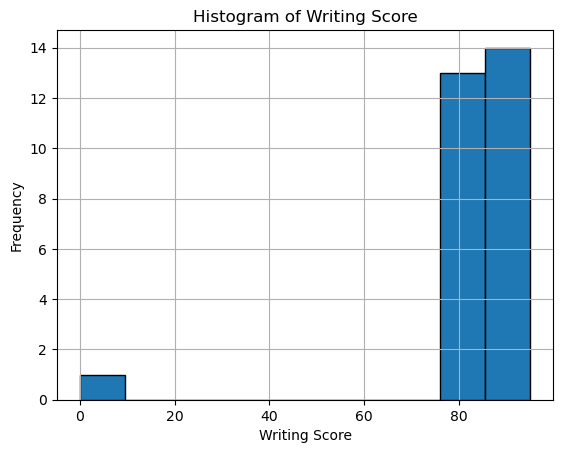

In [18]:
df['writing score'].plot.hist(bins=10, edgecolor='black')
plt.title('Histogram of Writing Score')
plt.xlabel('Writing Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()